# [ EXPLORATION ] 1. Iris의 세 가지 품종, 분류해볼 수 있겠어요?

✅기본적인 머신러닝 분류 태스크를 진행하고, 자주 사용되는 모델과 훈련 기법을 알아본다.

---
### - 📖목차
* ✔️1-11. 프로젝트(1) load_digits : 손글씨를 분류해 봅시다.
* ✔️1-12. 프로젝트(2) load_wine : 와인을 분류해 봅시다.
* ✔️1-13. 프로젝트(3) load_breast_cancer : 유방암 여부를 진단해 봅시다.
* ✔️회고 및 결론
* ✔️Reference(참고자료)

<br>



## ✔️1-11. 프로젝트(1) load_digits: 손글씨를 분류해 봅시다.
---



#### (1)필요한 모듈 import하기

In [ ]:
# 모듈
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 쓰이는 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 추가 모델(XGboost) : '들어가며' 파트 에서 XGboost도 명시되어 었던 관계로 포함
from xgboost import XGBClassifier

# 평가 지표 로드
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# 모듈 추가 로드
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### (2) 데이터 준비

In [ ]:
# 데이터 로드
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
# 데이터 정보 출력
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

- Classes : 10
- Samples per class : ~180
- Samples total : 1797
- Dimensionality : 64
- Features : integers 0-16

1797개의 데이터, label클래스는 숫자가 몇인지 체크되어 있는, pixel 8 x 8 크기의 이미지 로 이해

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

#### (3) 데이터 이해하기

In [ ]:
#각각 데이터 지정
digits_data = digits.data
digits_label = digits.target

# 데이터의 크기
print(digits_label.shape)
print(digits.data.shape)

# 데이터가 이미지이기 때문에 이미지 shape도 따로 출력
print(digits.images.shape)

(1797,)
(1797, 64)
(1797, 8, 8)


In [ ]:
# Feature Data 체크

digits_img = digits.images
print(digits.feature_names)
print(digits_img[0])

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  

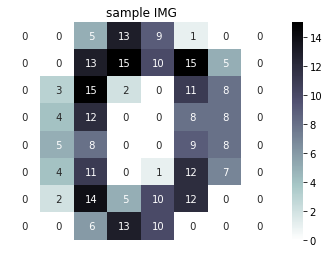

In [ ]:
# Feature 데이터의 시각적 확인 : 이 경우 8 X 8 사이즈의 이미지라는 걸 재차 확인할 수 있었다.
digits = load_digits()
sns.heatmap(digits.images[0], cmap=mpl.cm.bone_r, annot=True, fmt="2.0f",
            cbar=True, xticklabels=False, yticklabels=False)
plt.title("sample IMG")
plt.show()

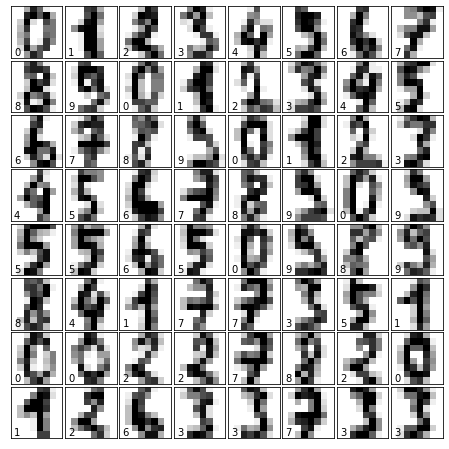

In [ ]:
# 실제 데이터가 궁금해서 구글링해서 돌려본 내장 데이터의 이미지 파일들
fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

In [ ]:
#Label Data 지정
digits_label = digits.target
print(digits_label)

[0 1 2 ... 8 9 8]


In [ ]:
#Target Name 출력
digits_targetNames = digits.target_names
print(digits_targetNames) #분류할 손글씨 종류에 따라, 라벨이 붙는다는 걸 확인.

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# 데이터 Describe(pandas 이용)
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df['label'] = digits_label # 그 김에 label도 같이 붙여서 출력
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [ ]:
digits_df.describe() #그렇게 괄목할만한 데이터는 아니므로 돌려만 보고 패스

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


#### (4) train, test 데이터 분리

In [ ]:
# X_train, x_test, y_train, y_test 생성
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=10)
#test size를 0.2의 비율로 맞추고, 랜덤 세트의 경우 10으로

In [ ]:
# 일단 train data의 갯수 먼저 확인
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [ ]:
# 테스트 갯수 확인 : 0.2의 비율이므로 20퍼센트만 분리된 것을 확인
X_test.shape, y_test.shape

((360, 64), (360,))

In [ ]:
X_train, X_test

(array([[ 0.,  0.,  6., ...,  7.,  0.,  0.],
        [ 0.,  0.,  5., ...,  8.,  0.,  0.],
        [ 0.,  0.,  5., ..., 16.,  2.,  0.],
        ...,
        [ 0.,  0.,  6., ..., 16., 16., 12.],
        [ 0.,  0., 15., ..., 13.,  6.,  0.],
        [ 0.,  0.,  2., ..., 11., 16.,  6.]]),
 array([[ 0.,  0.,  8., ...,  0.,  0.,  0.],
        [ 0.,  1., 13., ..., 16., 16.,  0.],
        [ 0.,  1., 13., ...,  1.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 15.,  5.,  0.],
        [ 0.,  0.,  0., ..., 12.,  1.,  0.],
        [ 0.,  1., 12., ...,  6.,  0.,  0.]]))

In [ ]:
y_train, y_test

(array([2, 1, 9, ..., 1, 8, 2]),
 array([5, 2, 5, 4, 8, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 8,
        6, 7, 8, 8, 5, 3, 5, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
        2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
        0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 1, 2, 8,
        8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
        3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 9, 7, 6,
        2, 5, 4, 3, 3, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 4, 6, 1, 1, 1, 4, 0,
        4, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
        9, 9, 4, 7, 3, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
        1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
        0, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
        4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
        7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 6, 0, 6, 6, 6, 7, 1, 6, 1, 7,
     

#### (5) 다양한 모델로 학습시켜보기 

In [ ]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred) #정확도(accuracy)
dt_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
dt_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
dt_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        37
           1       0.91      0.88      0.90        34
           2       0.83      0.88      0.86        34
           3       0.75      0.90      0.82        40
           4       0.74      0.76      0.75        34
           5       0.88      0.91      0.89        32
           6       0.91      0.86      0.89        37
           7       0.95      0.90      0.92        40
           8       0.74      0.70      0.72        33
           9       0.86      0.79      0.83        39

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360



In [ ]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred) #정확도(accuracy)
rf_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
rf_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
rf_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.94      1.00      0.97        34
           2       0.97      1.00      0.99        34
           3       0.95      0.97      0.96        40
           4       0.94      0.97      0.96        34
           5       0.97      0.97      0.97        32
           6       1.00      0.97      0.99        37
           7       0.95      1.00      0.98        40
           8       0.97      0.88      0.92        33
           9       0.97      0.92      0.95        39

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [ ]:
#SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

svm_acc = accuracy_score(y_test, y_pred) #정확도(accuracy)
svm_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
svm_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
svm_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       0.97      1.00      0.99        34
           3       1.00      0.97      0.99        40
           4       1.00      0.94      0.97        34
           5       0.97      1.00      0.98        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.91      0.97      0.94        33
           9       1.00      0.95      0.97        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
#SGD
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

sgd_acc = accuracy_score(y_test, y_pred) #정확도 따로 도출
sgd_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
sgd_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
sgd_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.82      0.91      0.86        34
           2       1.00      1.00      1.00        34
           3       0.91      0.97      0.94        40
           4       0.97      0.91      0.94        34
           5       0.96      0.84      0.90        32
           6       1.00      0.97      0.99        37
           7       1.00      0.95      0.97        40
           8       0.79      0.94      0.86        33
           9       1.00      0.90      0.95        39

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



In [ ]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred) #정확도 따로 도출
lr_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
lr_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
lr_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.91      0.91      0.91        34
           2       0.92      1.00      0.96        34
           3       1.00      0.95      0.97        40
           4       0.94      0.91      0.93        34
           5       0.94      0.94      0.94        32
           6       0.97      0.97      0.97        37
           7       0.97      0.95      0.96        40
           8       0.89      0.94      0.91        33
           9       0.97      0.92      0.95        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Xg Boost
xb_b = XGBClassifier()
xb_b.fit(X_train, y_train)
y_pred = xb_b.predict(X_test)

xb_acc = accuracy_score(y_test, y_pred) #정확도 따로 도출
xb_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
xb_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
xb_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.92      0.97      0.94        34
           2       0.97      0.97      0.97        34
           3       0.97      0.97      0.97        40
           4       0.97      0.94      0.96        34
           5       0.94      0.97      0.95        32
           6       1.00      0.97      0.99        37
           7       0.97      0.97      0.97        40
           8       0.83      0.91      0.87        33
           9       1.00      0.92      0.96        39

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.95       360
weighted avg       0.96      0.96      0.96       360



#### (6) 모델을 평가해보기

In [ ]:
#각 모델의 성능 비교 후 데이터프레임으로 정리

model = {'Accuracy':[dt_acc, rf_acc, svm_acc, sgd_acc, lr_acc, xb_acc],
         'Precision':[dt_pre, rf_pre, svm_pre, sgd_pre, lr_pre, xb_pre],
         'Recall':[dt_re, rf_re, svm_re, sgd_re, lr_re, xb_re],
         'F1 score':[dt_f1, rf_f1, svm_f1, sgd_f1, lr_f1, xb_f1]}

col = ['Decision Tree', 'Random Forest', 'SVM', 'SGD Classifier', 'Logistic Regression', 'XG boost']

df = pd.DataFrame(model, index=col)
df

,Accuracy,Precision,Recall,F1 score
Decision Tree,0.852778,0.855020,0.851129,0.851860
Random Forest,0.966667,0.967072,0.966215,0.966139
SVM,0.983333,0.982684,0.983459,0.982753
SGD Classifier,0.941667,0.945067,0.940208,0.940798
Logistic Regression,0.950000,0.948728,0.949647,0.948754
XG boost,0.955556,0.955190,0.955219,0.954729


In [ ]:
#정확도에서 성능이 뛰어난 모델을 도출

model = {'[Decision Tree]':dt_acc, '[Random Forest]':rf_acc, '[SVM]':svm_acc, '[SGD Classifier]':sgd_acc, 
         '[Logistic Regression]':lr_acc, '[XG boost]':xb_b_acc}

max_key = max(model, key=model.get)
max_value = max(model.values())

print(f'가장 정확도(accuracy)가 높은 모델은 {max_key}이며, 값은{(max_value)*100: .2f}% 입니다.')

가장 정확도(accuracy)가 높은 모델은 [SVM]이며, 값은 98.33% 입니다.


- 6개의 모델 중에서 가장 정확도가 높은 모델은 SVM이었다. Macro average로 각 클래스에 같은 가중치가 부여되었고, Weighted average로는 클래스 불균형을 맞춤으로서 값이 집계되었는데, SVM의 경우 정밀도와 재현률, f1 score까지 두루 높은 값을 보여주었기 때문에 이번 프로젝트에서 최종 최적화 모델은 SVM으로 확정했다.

<br>

## ✔️1-12. 프로젝트(2) load_wine : 와인을 분류해 봅시다.
---



#### (1)필요한 모듈 import하기

In [ ]:
# 모듈
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 쓰이는 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 추가 모델(XGboost) : '들어가며' 파트 에서 XGboost도 명시되어 었던 관계로 포함
from xgboost import XGBClassifier

# 평가 지표 로드
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# 모듈 추가 로드
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### (2) 데이터 준비

In [ ]:
#데이터 로드
wines = load_wine()
wines.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
#데이터 정보 출력
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

13개의 유형, 178개의 와인 성분 데이터로 이루어진 형태로 이해

* feature_names - 와인의 성분명
* targe(label) - 와인의 품종 데이터 

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

#### (3) 데이터 이해하기

In [ ]:
#데이터 크기 체크
wine_data = wines.data
print(wine_data.shape) 

(178, 13)


In [ ]:
#feature, label 데이터 지정
feature_data = wines.data

#Feature data 체크
print(wines.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
#Label 데이터 확인
label_data = wines.target
print(wines.target_names)

['class_0' 'class_1' 'class_2']


In [ ]:
wine_label #라벨값 출력 확인(0, 1, 2가 각기 분포되어 있는 것을 확인)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
#데이터 프레임으로 전 성분을 훑어보기
wine_df = pd.DataFrame(data=wine_data, columns=wines.feature_names)
wine_df["labels"] = wines.target #맨 끝에 label 추가
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
wine_df.describe() #각 요소들 값의 describe 도출

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
#각 요소들에 대해 결측치가 없는지 체크하기
data=pd.DataFrame(data=np.c_[wines['data'],wines['target']],columns=wines['feature_names']+['target'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

#### (4) train, test 데이터 분리

In [ ]:
# X_train, X_test, y_train, y_test 생성
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=9)
#test size를 0.2의 비율로 맞추고, 랜덤 세트의 경우 9로

In [ ]:
# 일단 train data의 갯수 먼저 확인
X_train.shape, y_train.shape

((142, 13), (142,))

In [ ]:
# 테스트 갯수 확인 : 0.2의 비율이므로 20퍼센트만 분리된 것을 확인
X_test.shape, y_test.shape

((36, 13), (36,))

In [ ]:
X_train, X_test

(array([[1.352e+01, 3.170e+00, 2.720e+00, ..., 8.900e-01, 2.060e+00,
         5.200e+02],
        [1.356e+01, 1.730e+00, 2.460e+00, ..., 9.800e-01, 3.030e+00,
         1.120e+03],
        [1.229e+01, 2.830e+00, 2.220e+00, ..., 1.150e+00, 3.300e+00,
         2.900e+02],
        ...,
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02],
        [1.269e+01, 1.530e+00, 2.260e+00, ..., 9.600e-01, 2.060e+00,
         4.950e+02],
        [1.243e+01, 1.530e+00, 2.290e+00, ..., 6.900e-01, 2.840e+00,
         3.520e+02]]),
 array([[1.377000e+01, 1.900000e+00, 2.680000e+00, 1.710000e+01,
         1.150000e+02, 3.000000e+00, 2.790000e+00, 3.900000e-01,
         1.680000e+00, 6.300000e+00, 1.130000e+00, 2.930000e+00,
         1.375000e+03],
        [1.305000e+01, 1.770000e+00, 2.100000e+00, 1.700000e+01,
         1.070000e+02, 3.000000e+00, 3.000000e+00, 2.800000e-01,
         2.030000e+00, 5.040000e+00, 8.800000e-01, 3.350000e+00,
         8.850000e+02],
       

In [ ]:
y_train, y_test

(array([2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1,
        2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1,
        0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2,
        1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 0,
        0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0,
        2, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1,
        0, 1, 0, 1, 1, 2, 0, 2, 1, 1]),
 array([0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2]))

#### (5) 다양한 모델로 학습시켜보기 

In [ ]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred) #정확도(accuracy)
dt_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
dt_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
dt_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [ ]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred) #정확도(accuracy)
rf_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
rf_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
rf_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
#SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

svm_acc = accuracy_score(y_test, y_pred) #정확도(accuracy)
svm_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
svm_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
svm_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.73      0.70        11
           2       0.43      0.38      0.40         8

    accuracy                           0.75        36
   macro avg       0.68      0.68      0.68        36
weighted avg       0.74      0.75      0.75        36



In [ ]:
#SGD
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

sgd_acc = accuracy_score(y_test, y_pred) #정확도 따로 도출
sgd_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
sgd_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
sgd_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.50      1.00      0.67        11
           2       0.00      0.00      0.00         8

    accuracy                           0.69        36
   macro avg       0.50      0.61      0.52        36
weighted avg       0.62      0.69      0.63        36



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

In [ ]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred) #정확도 따로 도출
lr_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
lr_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
lr_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Xg Boost
xb_b = XGBClassifier()
xb_b.fit(X_train, y_train)
y_pred = xb_b.predict(X_test)

xb_acc = accuracy_score(y_test, y_pred) #정확도 따로 도출
xb_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
xb_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
xb_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



#### (6) 모델을 평가해보기

In [ ]:
#각 모델의 성능 비교 후 데이터프레임으로 정리

model = {'Accuracy':[dt_acc, rf_acc, svm_acc, sgd_acc, lr_acc, xb_acc],
         'Precision':[dt_pre, rf_pre, svm_pre, sgd_pre, lr_pre, xb_pre],
         'Recall':[dt_re, rf_re, svm_re, sgd_re, lr_re, xb_re],
         'F1 score':[dt_f1, rf_f1, svm_f1, sgd_f1, lr_f1, xb_f1]}

col = ['Decision Tree', 'Random Forest', 'SVM', 'SGD Classifier', 'Logistic Regression', 'XG boost']

df = pd.DataFrame(model, index=col)
df

,Accuracy,Precision,Recall,F1 score
Decision Tree,0.972222,0.972222,0.980392,0.975406
Random Forest,1.000000,1.000000,1.000000,1.000000
SVM,0.750000,0.678805,0.681150,0.678943
SGD Classifier,0.694444,0.500000,0.607843,0.523297
Logistic Regression,1.000000,1.000000,1.000000,1.000000
XG boost,0.972222,0.972222,0.980392,0.975406


In [ ]:
#정확도에서 성능이 뛰어난 모델을 도출

model = {'[Decision Tree]':dt_acc, '[Random Forest]':rf_acc, '[SVM]':svm_acc, '[SGD Classifier]':sgd_acc, 
         '[Logistic Regression]':lr_acc, '[XG boost]':xb_b_acc}

max_key = max(model, key=model.get)
max_value = max(model.values())

print(f'가장 정확도(accuracy)가 높은 모델은 {max_key}이며, 값은{(max_value)*100: .2f}% 입니다.')

가장 정확도(accuracy)가 높은 모델은 [Random Forest]이며, 값은 100.00% 입니다.


일단 와인 분류에서 가장 중요한 건 '3종류로 갈라지는 label 값을 얼마나 정확히 분류하느냐'이다. 

따라서 이 값을 정확히 믿을 수 있는지의 여부가 중요하기 때문에 여기서는 정확도가 비슷하다면 recall값 위주로 눈여겨 보는 것이 좋다고 판단했다. 그중에서도 Random Forest는 여러 모델 중에서도 월등한 성능을 보여줬으며, Logistic Regression 역시 엇비슷한 역량을 자랑했다.

<br>

## ✔️1-13. 프로젝트(3) load_breast_cancer : 유방암 여부를 진단해 봅시다.
---



#### (1)필요한 모듈 import하기

In [ ]:
# 모듈
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 쓰이는 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 추가 모델(XGboost) : '들어가며' 파트 에서 XGboost도 명시되어 었던 관계로 포함
from xgboost import XGBClassifier

# 평가 지표 로드
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# 모듈 추가 로드
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### (2) 데이터 준비

In [ ]:
# 데이터 로드
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
#데이터 정보 출력
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

feture은 30개, label은 2개로 구성된 의료 데이터

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

#### (3) 데이터 이해하기

In [ ]:
#데이터 크기
cancer_data = cancer.data
cancer_label = cancer.target

print(cancer_data.shape)
print(cancer_label.shape)

(569, 30)
(569,)


In [ ]:
# Feature Data 체크
feature_data = cancer.data
feature_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
#label data 체크

cancer_label = cancer.target
cancer_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#데이터 프레임으로 데이터 확인
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df['label'] = cancer_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### (4) train, test 데이터 분리

In [ ]:
# X_train, x_test, y_train, y_test 생성
X_train, X_test, y_train, y_test = train_test_split(cancer_data,
                                                   cancer_label,
                                                   test_size=0.2,
                                                   random_state=10)

#test size를 0.2의 비율로 맞추고, 랜덤 세트의 경우 10으로

In [ ]:
# 일단 train data의 갯수 먼저 확인
X_train.shape, y_train.shape

((455, 30), (455,))

In [ ]:
# 테스트 갯수 확인 : 0.2의 비율이므로 20퍼센트만 분리된 것을 확인
X_test.shape, y_test.shape

((114, 30), (114,))

In [ ]:
X_train, X_test

(array([[2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [1.377e+01, 1.327e+01, 8.806e+01, ..., 5.802e-02, 2.823e-01,
         6.794e-02],
        [1.537e+01, 2.276e+01, 1.002e+02, ..., 1.476e-01, 2.556e-01,
         6.828e-02],
        ...,
        [1.234e+01, 1.227e+01, 7.894e+01, ..., 1.070e-01, 3.110e-01,
         7.592e-02],
        [1.385e+01, 1.721e+01, 8.844e+01, ..., 5.104e-02, 2.364e-01,
         7.182e-02],
        [2.073e+01, 3.112e+01, 1.357e+02, ..., 1.659e-01, 2.868e-01,
         8.218e-02]]),
 array([[1.546e+01, 1.189e+01, 1.025e+02, ..., 1.827e-01, 3.216e-01,
         1.010e-01],
        [9.333e+00, 2.194e+01, 5.901e+01, ..., 2.564e-02, 2.435e-01,
         7.393e-02],
        [1.369e+01, 1.607e+01, 8.784e+01, ..., 6.987e-02, 3.323e-01,
         7.701e-02],
        ...,
        [1.180e+01, 1.726e+01, 7.526e+01, ..., 5.356e-02, 2.779e-01,
         8.121e-02],
        [2.034e+01, 2.151e+01, 1.359e+02, ..., 2.685e-01, 5.558e-01,
   

In [ ]:
y_train, y_test

(array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 

#### (5) 다양한 모델로 학습시켜보기 

In [ ]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred) #정확도(accuracy)
dt_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
dt_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
dt_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        39
           1       0.97      0.87      0.92        75

    accuracy                           0.89       114
   macro avg       0.88      0.91      0.89       114
weighted avg       0.91      0.89      0.90       114



In [ ]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred) #정확도(accuracy)
rf_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
rf_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
rf_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
#SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

svm_acc = accuracy_score(y_test, y_pred) #정확도(accuracy)
svm_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
svm_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
svm_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.91      0.97      0.94        75

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [ ]:
#SGD
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

sgd_acc = accuracy_score(y_test, y_pred) #정확도 따로 도출
sgd_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
sgd_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
sgd_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.97      0.72        39
           1       0.98      0.63      0.76        75

    accuracy                           0.75       114
   macro avg       0.78      0.80      0.74       114
weighted avg       0.84      0.75      0.75       114



In [ ]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred) #정확도 따로 도출
lr_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
lr_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
lr_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.97      0.93      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Xg Boost
xb_b = XGBClassifier()
xb_b.fit(X_train, y_train)
y_pred = xb_b.predict(X_test)

xb_acc = accuracy_score(y_test, y_pred) #정확도 따로 도출
xb_re = recall_score(y_test, y_pred, average='macro') #재현율(recall)
xb_f1 = f1_score(y_test, y_pred, average='macro') #f1 score, 정밀도와 재현율의 가중 조화평균
xb_pre = precision_score(y_test, y_pred, average='macro') #정밀도(precision)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.99      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



#### (6) 모델을 평가해보기

In [ ]:
#각 모델의 성능 비교 후 데이터프레임으로 정리

model = {'Accuracy':[dt_acc, rf_acc, svm_acc, sgd_acc, lr_acc, xb_acc],
         'Precision':[dt_pre, rf_pre, svm_pre, sgd_pre, lr_pre, xb_pre],
         'Recall':[dt_re, rf_re, svm_re, sgd_re, lr_re, xb_re],
         'F1 score':[dt_f1, rf_f1, svm_f1, sgd_f1, lr_f1, xb_f1]}

col = ['Decision Tree', 'Random Forest', 'SVM', 'SGD Classifier', 'Logistic Regression', 'XG boost']

df = pd.DataFrame(model, index=col)
df

,Accuracy,Precision,Recall,F1 score
Decision Tree,0.894737,0.878692,0.907692,0.887979
Random Forest,0.982456,0.975610,0.986667,0.980743
SVM,0.921053,0.926838,0.896923,0.909324
SGD Classifier,0.745614,0.777462,0.800513,0.744019
Logistic Regression,0.938596,0.926587,0.941026,0.932981
XG boost,0.964912,0.956565,0.967179,0.961486


In [ ]:
#정확도에서 성능이 뛰어난 모델을 도출,

model = {'[Decision Tree]':dt_acc, '[Random Forest]':rf_acc, '[SVM]':svm_acc, '[SGD Classifier]':sgd_acc, 
         '[Logistic Regression]':lr_acc, '[XG boost]':xb_b_acc}

max_key = max(model, key=model.get)
max_value = max(model.values())

print(f'가장 정확도(accuracy)가 높은 모델은 {max_key}이며, 값은{(max_value)*100: .2f}% 입니다.')

가장 정확도(accuracy)가 높은 모델은 [Random Forest]이며, 값은 98.25% 입니다.


이번에는 각 환자마다 '암인가 아닌가'에 대한 예측이 정확해야하고, 양성과 음성의 여부의 정확성이 중요하다고 생각했다. 

그렇기 때문에 Recall의 여부가 중요하게 판단된다. Recall의 값이 가장 높았던건 Random Forest였으며, 정확도 역시 동일하게 높았기 때문에, 이번 프로젝트에서 가장 뛰어난 역량을 보여줬던건 Random Forest였다.

<br>

## ✔️회고 및 결론
---



#### ▶️ 이번 프로젝트에서 어려웠던 점

일단 각 모델들이 어디에 유용한지를 처음에 감을 잡을 수 없어서 간단한 이론부터 짚고 넘어가야 했다. 그 과정에서 간단하게 모델들을 구별하는게 쉽진 않았다.

1. Decision Tree
2. Random Forest
3. SVM
4. SGD Classifier
5. Logistic Regression
6. XG boost

이번 EX노드의 '들어가며' 파트에서는 XG boost가 있어서 따로 추가했고, 캐글에서 이정도는 되어야 최저선에 충족된다는 말에 더 뛰어나지 않을까 했는데, 이번 결과에서는 그렇게 눈에 띄진 않았다. 각 모델들이 어떤 상황에서 각기 뛰어난 성능을 보여줄지를 알려면 더 많은 경험이 필요하다는 걸 깨달았다.

하지만 그 뒤에 또 다른 종류의 난항이 기다리고 있었는데, 바로 Confusion Matrix 였다. 아직도 TP, FP, FN, TF에서부터 비롯되는 정확도, 재현률, 정밀도와 f1 score의 정의와 어떻게 쓰이는지 능숙하게 연결되지 않아서 애를 먹었는데, 앞으로도 신경을 많이 써야겠다는 생각이 들었다.



<br>

#### ▶️ 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

모델 구현이 힘들거라고 생각했는데 의외로 한줄씩만 바꾸면 된다는 걸 깨달았고, 그 과정에서 반복되는 코드들은 def 같은 함수나 클래스를 써서 아예 통일했으면 훨씬 효율적이지 않았을까 생각해보게 되었다. 하지만 제대로 구현하기에는 아직 코드가 꼬일 수 있다고 생각해서 더 추가하지는 않았다. 그 외에 데이터프레임으로 최대한 보기 편하게 구현하려고 추가적으로 report 값을 모듈에서 가져오긴 했는데 민감도가 여기 왜 없는지는 한번 더 살펴보고 싶다.

<br>

#### ▶️ 루브릭 평가 지표를 맞추기 위해 시도한 것들

이번 프로젝트에서 루브릭의 기준은 아래와 같았다.
1. 3가지 데이터셋 구성이 합리적으로 진행되었는가?
2. 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?
3. 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?

데이터 셋의 경우 직접 수집해서 하는게 아니라 사이킷런 내의 데이터를 이용하는 것이기 대문에 큰 어려움이 없었고, XG boost를 추가해서 총 6개의 모델을 돌릴 수 있었는데 이 역시도 애초에 모듈이 다 짜여져 있는 상태였으므로 이론적인 이해가 더 중요했다. 마지막으로 모델들의 평가지표가 헷갈리곤 했는데 실제 우리가 모델을 구현함으로서 '매우 정확한'걸 원하거나 '적당한 분류값'을 원할 수도 있고, '아닌 것만'골라낼 수 있는 많은 선택지에 따라 유기적으로 지표를 택할 수 있다는 점에 주력하기로 했다.

개인적으로 Wine 같은 경우 각 성분에 대한 요소들이 흥미로워서 시각화 과정을 많이 찾아봤는데, 생각만큼 확실히 구현되지 않는 것 같아서 좀 더 찾아봐야겠다 싶어 미처 쓰지 않은 부분들을 나중에 활용하고자 레퍼런스로 남겨뒀다. 그리고 Logistic Regression 을 돌릴 때마다 에러가 떠서 찾아봤었는데, 해결된다는 코드를 돌려봐도 사라지지 않는 점에서 묘하게 찝찝했다. 이건 다시 찾아봐야 될 것 같다..

<br>

#### ▶️ 자기 다짐

실제로 코드를 돌리는 시간보다 이론적으로 각각의 모델들과 수치 값을 이하는게 더 많이 걸렸던 프로젝트였다. 사실 기본적인 사항들은 날이 갈 수록 더 모르면 모를수록 코너에 몰릴 수도 있다는 생각이 들어서 더 바짝 공부해야겠다는 다짐이 들었던 프로젝트였다. 그와 더불어 미리 준비된 정형 데이터만큼이나 데이터 클리닝을 제대로 할 수 있을지 고민하게 만든 순간이었다.

<br>

## ✔️Reference(참고자료)
---
* https://steadiness-193.tistory.com/267
* https://gaussian37.github.io/ml-concept-ml-evaluation/
* https://wikidocs.net/49632
* https://hmkim312.github.io/posts/%EC%99%80%EC%9D%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%ED%95%B4%EB%B3%B4%EB%8A%94_%EB%B6%80%EC%8A%A4%ED%8C%85_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_Boosting_Algorithm_/
* https://kurt7191.tistory.com/25
* https://medium.com/analytics-vidhya/xgboost-classifier-hand-written-digit-recognition-219acedfef13
* https://amueller.github.io/dabl/dev/auto_examples/plot/plot_wine.html
* https://www.alldatascience.com/classification/wine-dataset-analysis-with-python/

* https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_digits_simple_classif.html

